In [2]:
import pandas as pd
from os import path, listdir
from pathlib import Path
import proc_model
import matplotlib.pyplot as plt

In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

###Read input data <br/>

In [8]:
data_dir = path.join(path.dirname(proc_model.__file__), 'outputs')
home = str(Path.home())
output_dir = path.join(home, 'Documents', 'bachelor', 'article', 'pm_results')
input_files = listdir(data_dir)
SAVE = False

#Minor road delay and pSeed <br/>

In [5]:
# function to parse parameters' values from experiment name
def get_delay(name):
    delay = name.split('_')[2]
    return int(delay[12:])


def get_seed(name):
    seed = name.split('_')[3]
    return int(seed[5:])


In [6]:
#read dataframe
filename = [f for f in input_files if 'seed' in f][0]
df = pd.read_csv(path.join(data_dir, filename))
df['delay'] = df['city'].apply(get_delay)
df['pSeed'] = df['city'].apply(get_seed)

##1. pSeed vs other params for different delays

In [7]:
values = [i for i in set(df.delay)]
x_col = 'pSeed'

###1.1 Plot node densities

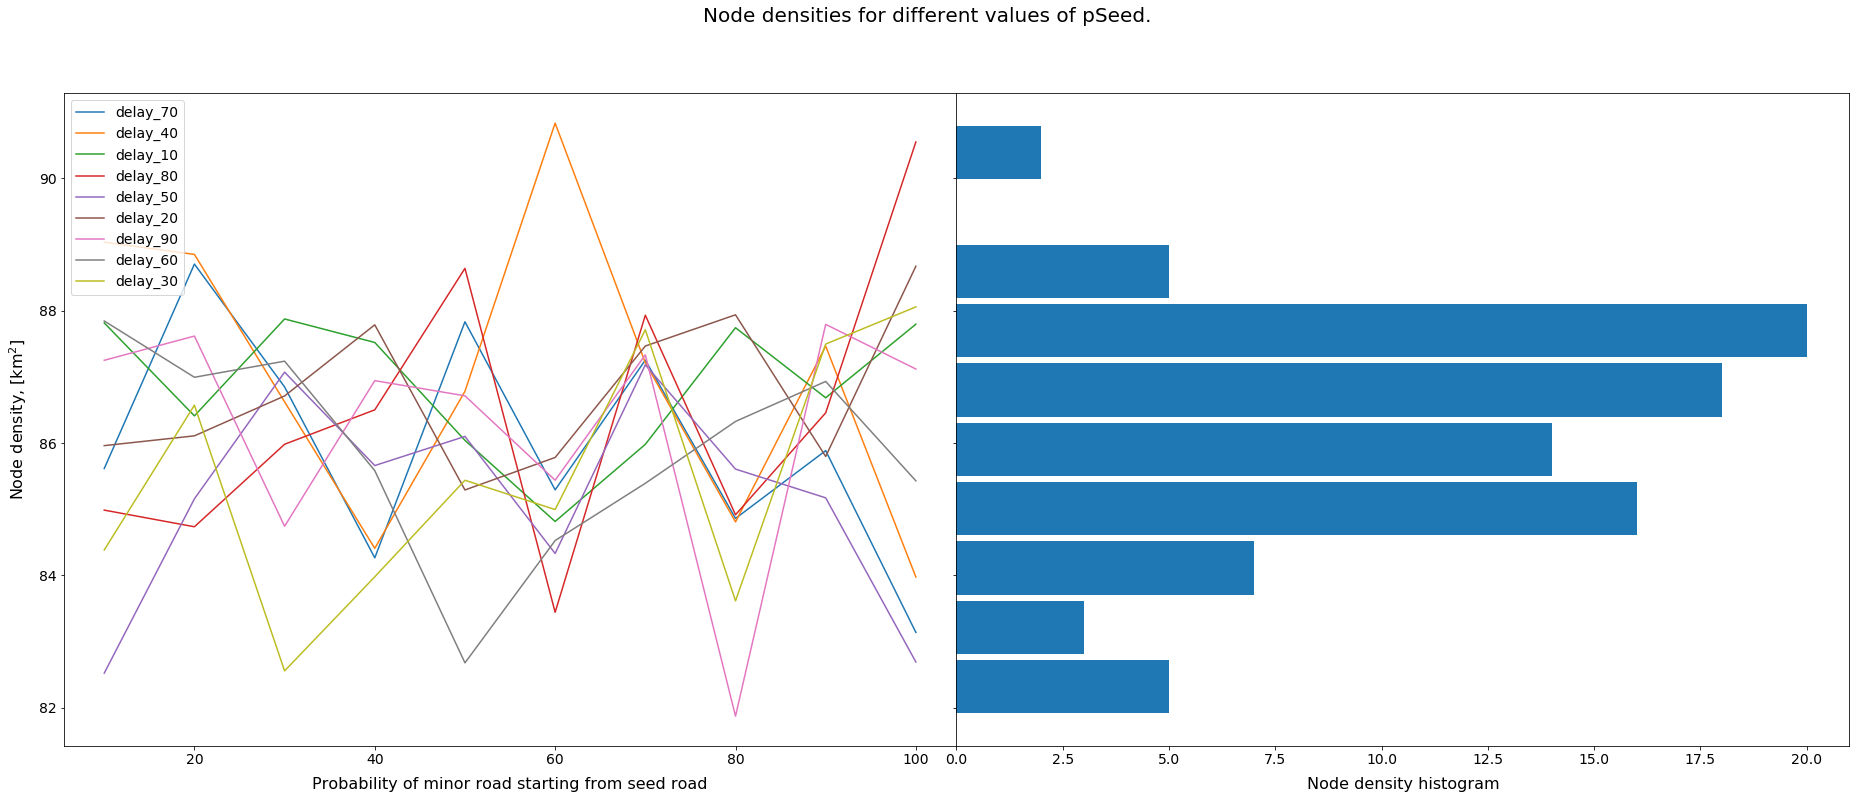

In [9]:
label = 'node_density_km'

fig, axes = plt.subplots(ncols=2, sharey=True,  figsize=(32, 12))
plt.suptitle('Node densities for different values of pSeed.')

# ax = plt.gca()
ax = axes[0]
for val in values:
    df_ = df[df.delay == val]
    df_.plot(kind='line', x=x_col, y=label, label='delay_%s' % val, ax=ax)
# fig.legend(bbox_to_anchor=(-2, 1))

ax.set_xlabel('Probability of minor road starting from seed road', labelpad=10)
ax.set_ylabel('Node density, [km$^2$]', labelpad=10)
ax.legend(loc=2)
ax = axes[1]
df[[label]].plot(kind='hist',rwidth=0.9, ax=ax, orientation='horizontal')
ax.set_xlabel('Node density histogram', labelpad=10)
ax.get_legend().remove()
plt.subplots_adjust(wspace=0)

if SAVE:
    plt.savefig(path.join(output_dir, 'pSeed_density.eps'), bbox_inches='tight')


###Plot node degrees

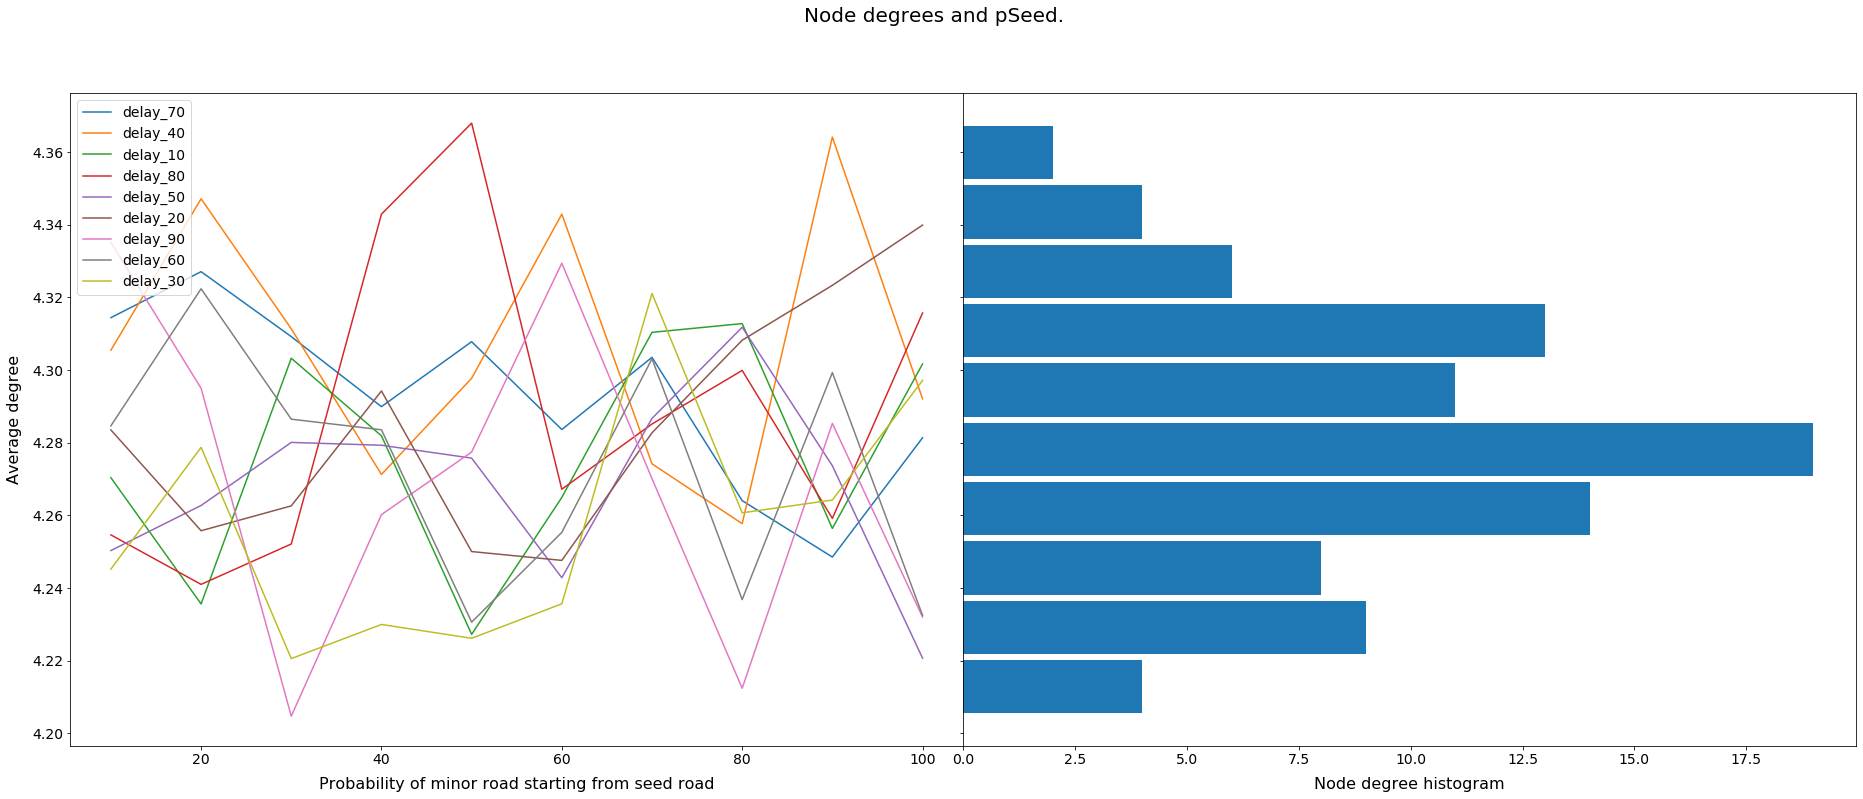

In [10]:
label = 'degree_avg'

fig, axes = plt.subplots(ncols=2, sharey=True,  figsize=(32, 12))
plt.suptitle('Node degrees and pSeed.')

ax = axes[0]
for val in values:
    df_ = df[df.delay == val]
    df_.plot(kind='line', x=x_col, y=label, label='delay_%s' % val, ax=ax)

ax.set_xlabel('Probability of minor road starting from seed road', labelpad=10)
ax.set_ylabel('Average degree', labelpad=10)
ax.legend(loc=2)
ax = axes[1]
df[[label]].plot(kind='hist',rwidth=0.9, ax=ax, orientation='horizontal')
ax.set_xlabel('Node degree histogram', labelpad=10)
ax.get_legend().remove()
plt.subplots_adjust(wspace=0)

if SAVE:
    plt.savefig(path.join(output_dir, 'pSeed_degree.eps'), bbox_inches='tight')


###Plot node and edge counts

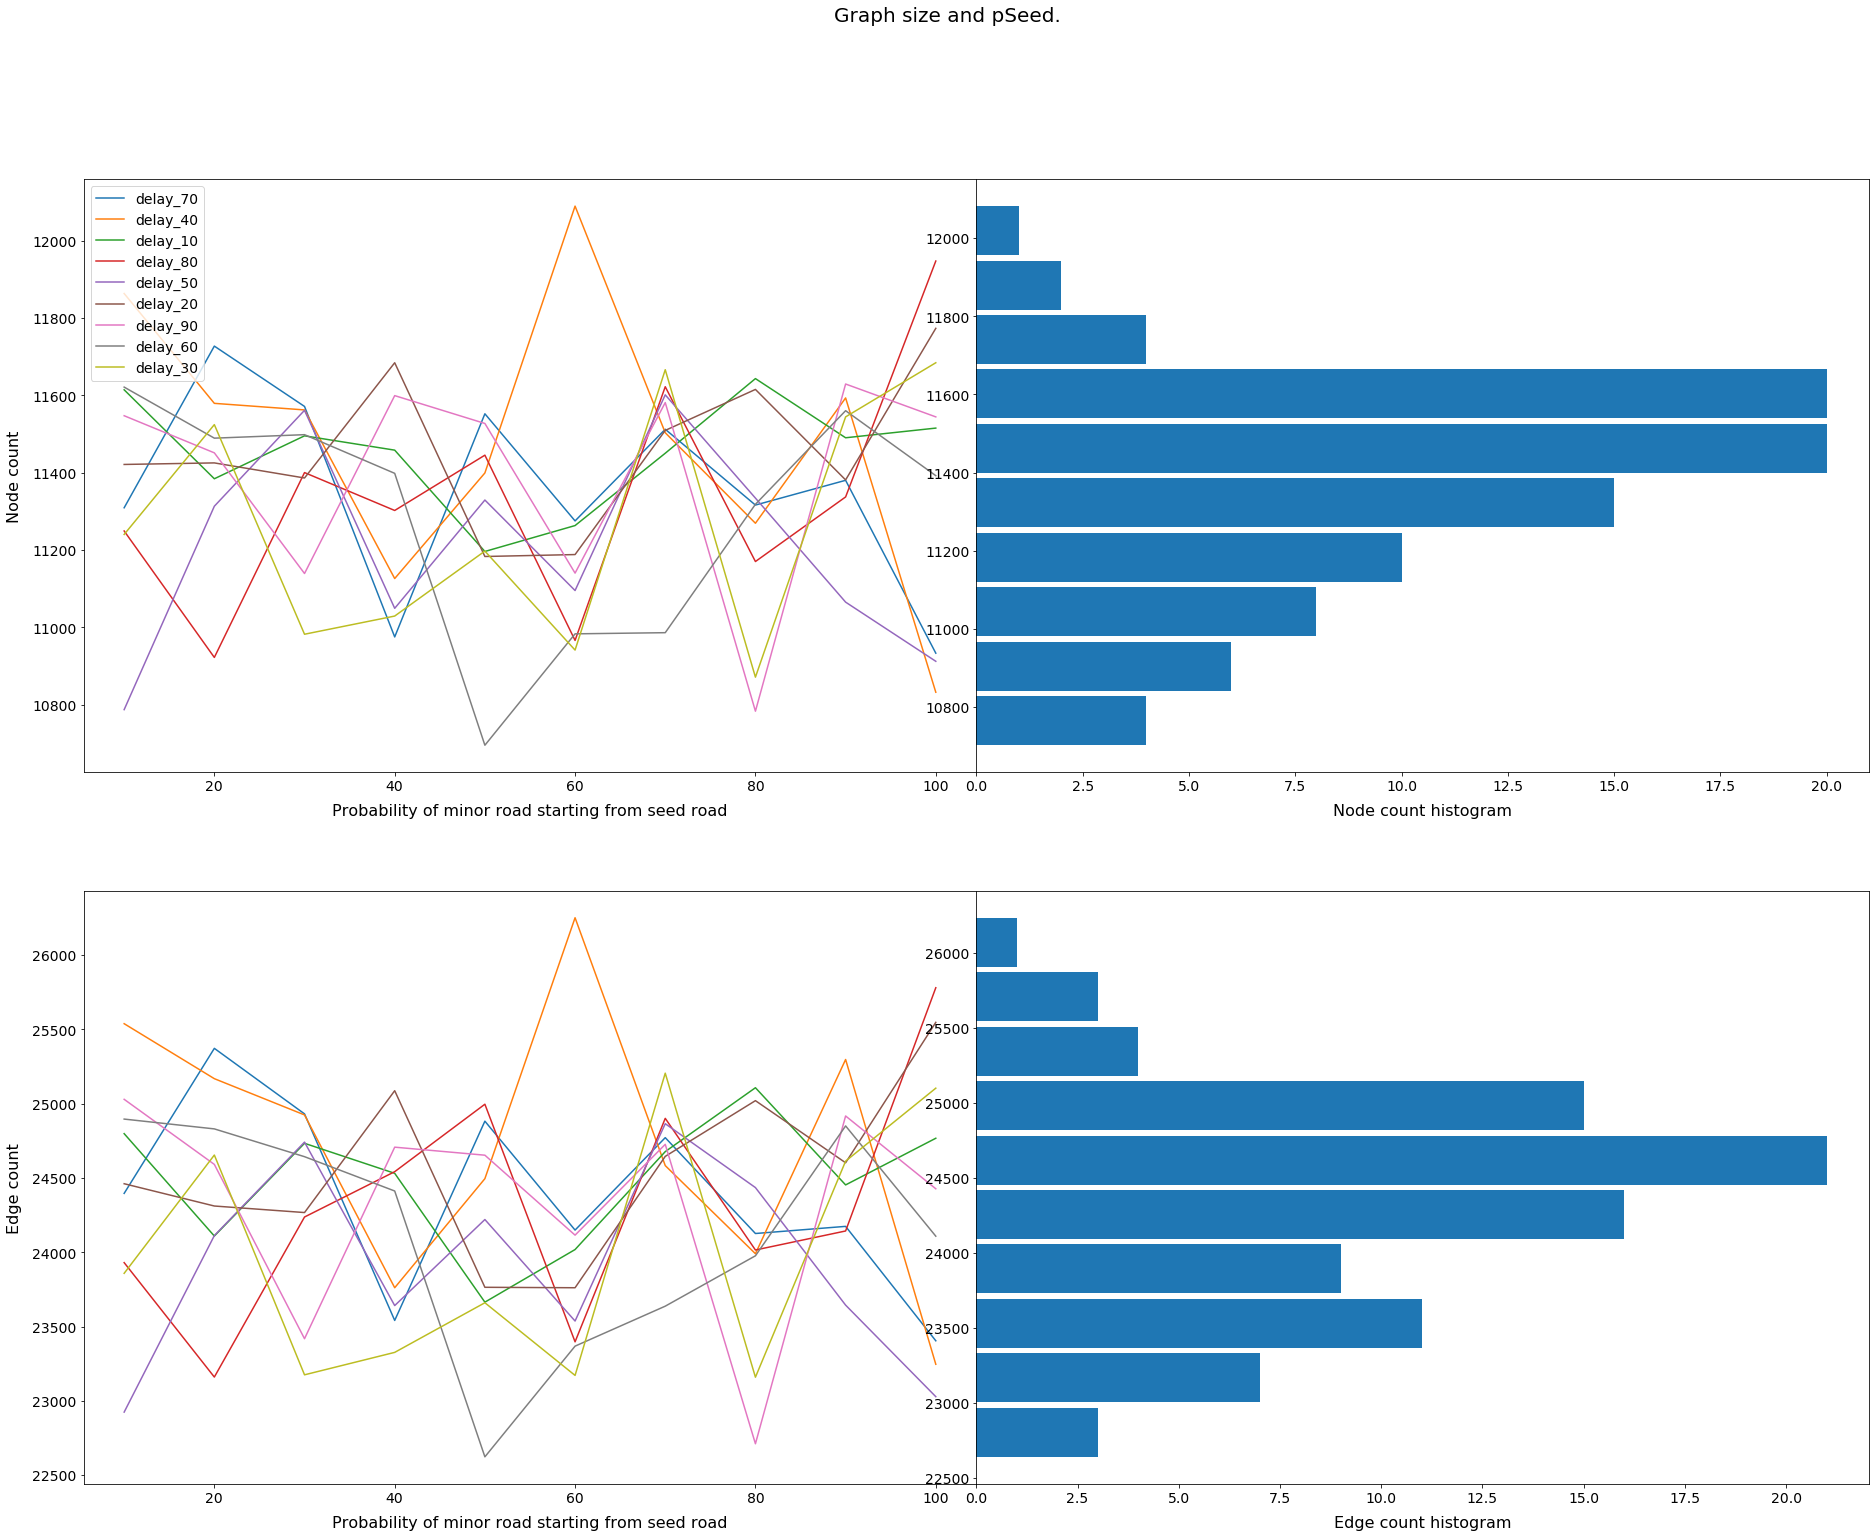

In [11]:
label1, label2 = 'num_nodes','num_edges'

fig, axes = plt.subplots(nrows=2, ncols=2,   figsize=(32, 24))
plt.suptitle('Graph size and pSeed.')

ax = axes[0][0]
for val in values:
    df_ = df[df.delay == val]
    df_.plot(kind='line', x=x_col, y=label1, label='delay_%s' % val, ax=ax)

ax.set_xlabel('Probability of minor road starting from seed road', labelpad=10)
ax.set_ylabel('Node count', labelpad=10)
ax.legend(loc=2)
ax = axes[0][1]
df[[label1]].plot(kind='hist',rwidth=0.9,  ax=ax, orientation='horizontal')
ax.get_legend().remove()
ax.set_xlabel('Node count histogram', labelpad=10)

ax = axes[1][0]
for val in values:
    df_ = df[df.delay == val]
    df_.plot(kind='line', x=x_col, y=label2, label='delay_%s' % val, ax=ax)

ax.set_xlabel('Probability of minor road starting from seed road', labelpad=10)
ax.set_ylabel('Edge count', labelpad=10)
ax.get_legend().remove()
ax = axes[1][1]
df[[label2]].plot(kind='hist',rwidth=0.9,  ax=ax, orientation='horizontal')
ax.get_legend().remove()
ax.set_xlabel('Edge count histogram', labelpad=10)
plt.subplots_adjust(wspace=0)

if SAVE:
    plt.savefig(path.join(output_dir, 'pSeed_counts.eps'), bbox_inches='tight')


##Minor road delay vs other params for pSeed values

In [12]:
values = [i for i in set(df.pSeed)]
x_col = 'delay'

###Plot node densities

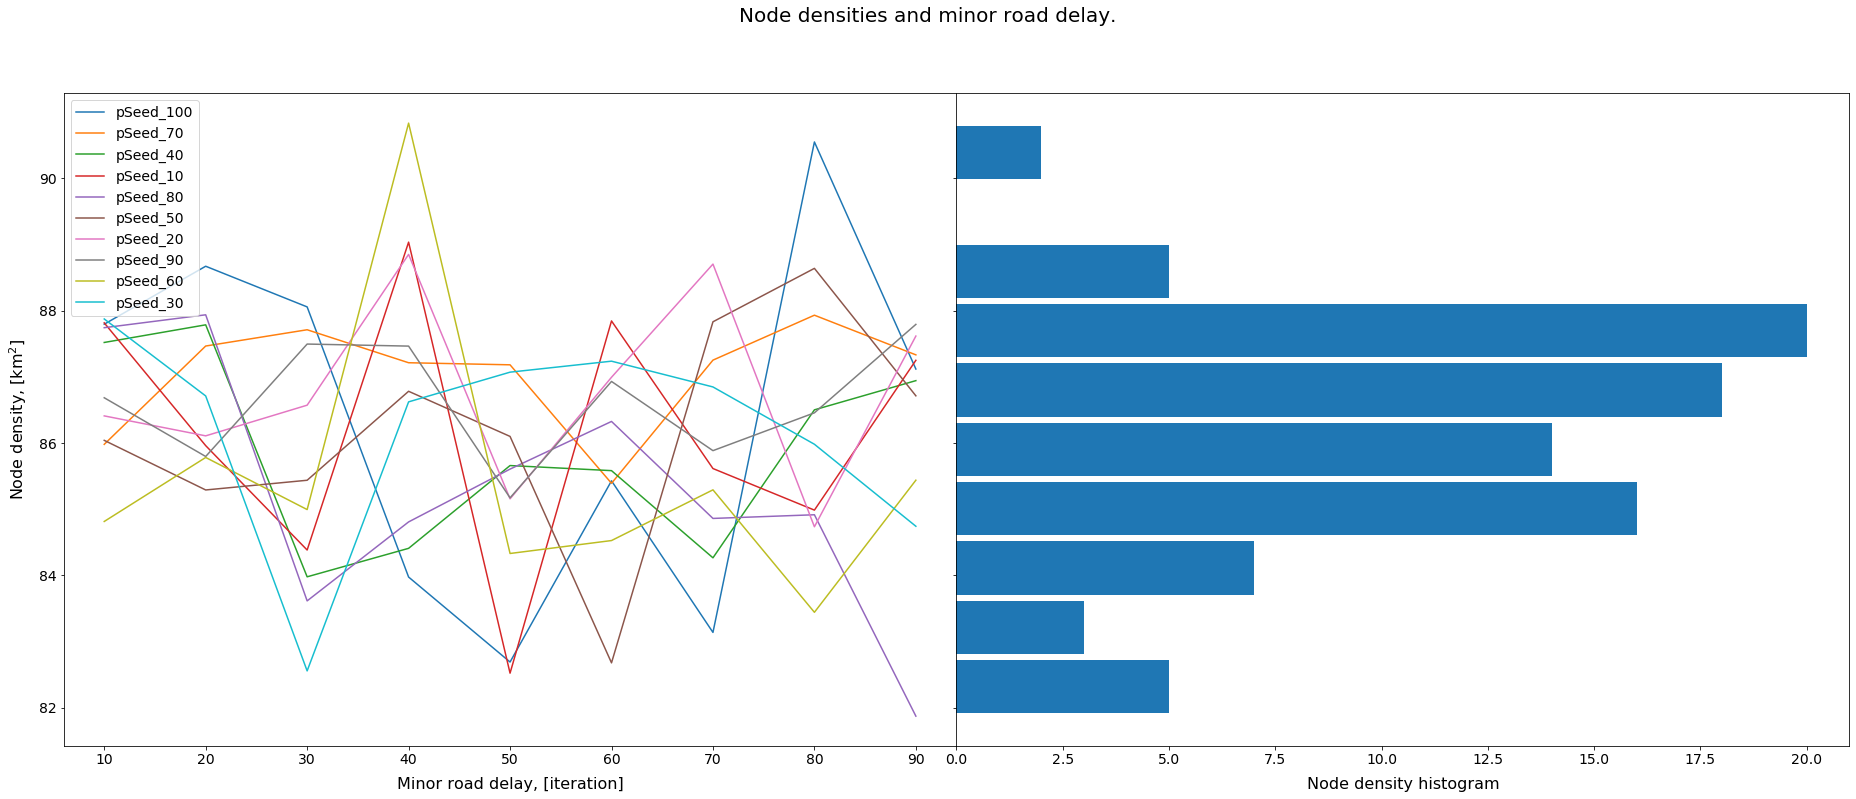

In [13]:
label = 'node_density_km'

fig, axes = plt.subplots(ncols=2, sharey=True,  figsize=(32, 12))
plt.suptitle('Node densities and minor road delay.')

ax = axes[0]
for val in values:
    df_ = df[df.pSeed == val]
    df_.plot(kind='line', x=x_col, y=label, label='pSeed_%s' % val, ax=ax)

ax.set_xlabel('Minor road delay, [iteration]', labelpad=10)
ax.set_ylabel('Node density, [km$^2$]', labelpad=10)
ax.legend(loc=2)
ax = axes[1]
df[[label]].plot(kind='hist',rwidth=0.9, ax=ax, orientation='horizontal')
ax.set_xlabel('Node density histogram', labelpad=10)
ax.get_legend().remove()
plt.subplots_adjust(wspace=0)

if SAVE:
    plt.savefig(path.join(output_dir, 'delay_density.eps'), bbox_inches='tight')


###2.2 Plot node degrees

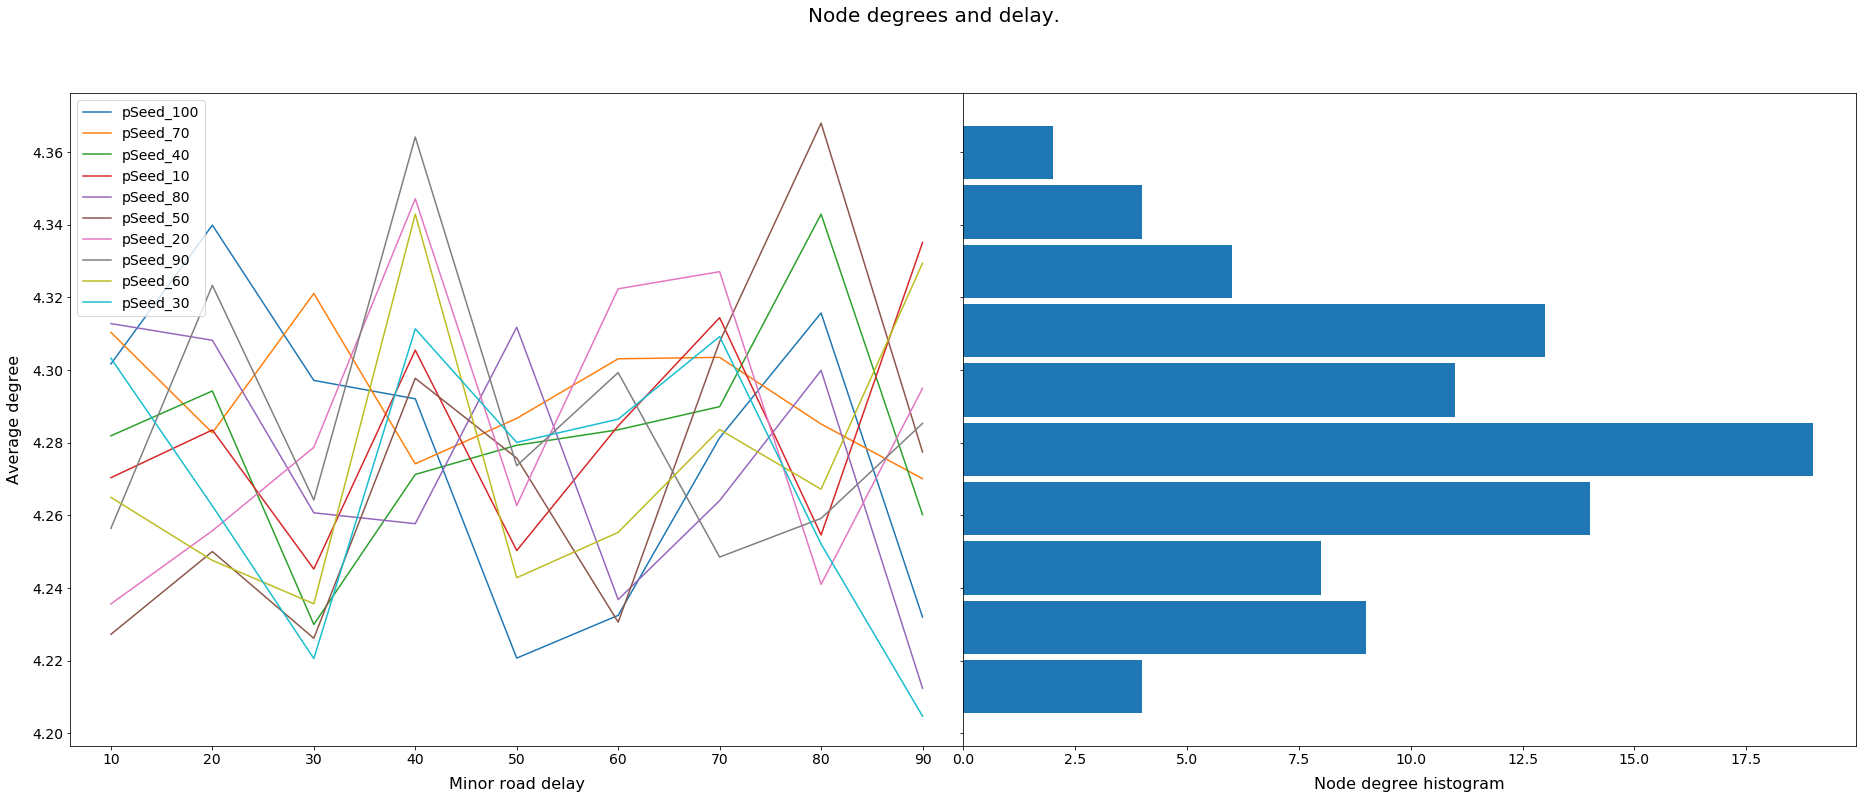

In [14]:
label = 'degree_avg'

fig, axes = plt.subplots(ncols=2, sharey=True,  figsize=(32, 12))
plt.suptitle('Node degrees and delay.')

ax = axes[0]
for val in values:
    df_ = df[df.pSeed == val]
    df_.plot(kind='line', x=x_col, y=label, label='pSeed_%s' % val, ax=ax)

ax.set_xlabel('Minor road delay', labelpad=10)
ax.set_ylabel('Average degree', labelpad=10)
ax.legend(loc=2)
ax = axes[1]
df[[label]].plot(kind='hist',rwidth=0.9, ax=ax, orientation='horizontal')
ax.set_xlabel('Node degree histogram', labelpad=10)
ax.get_legend().remove()
plt.subplots_adjust(wspace=0)

if SAVE:
    plt.savefig(path.join(output_dir, 'delay_degree.eps'), bbox_inches='tight')


###2.3 Plot node and edge counts

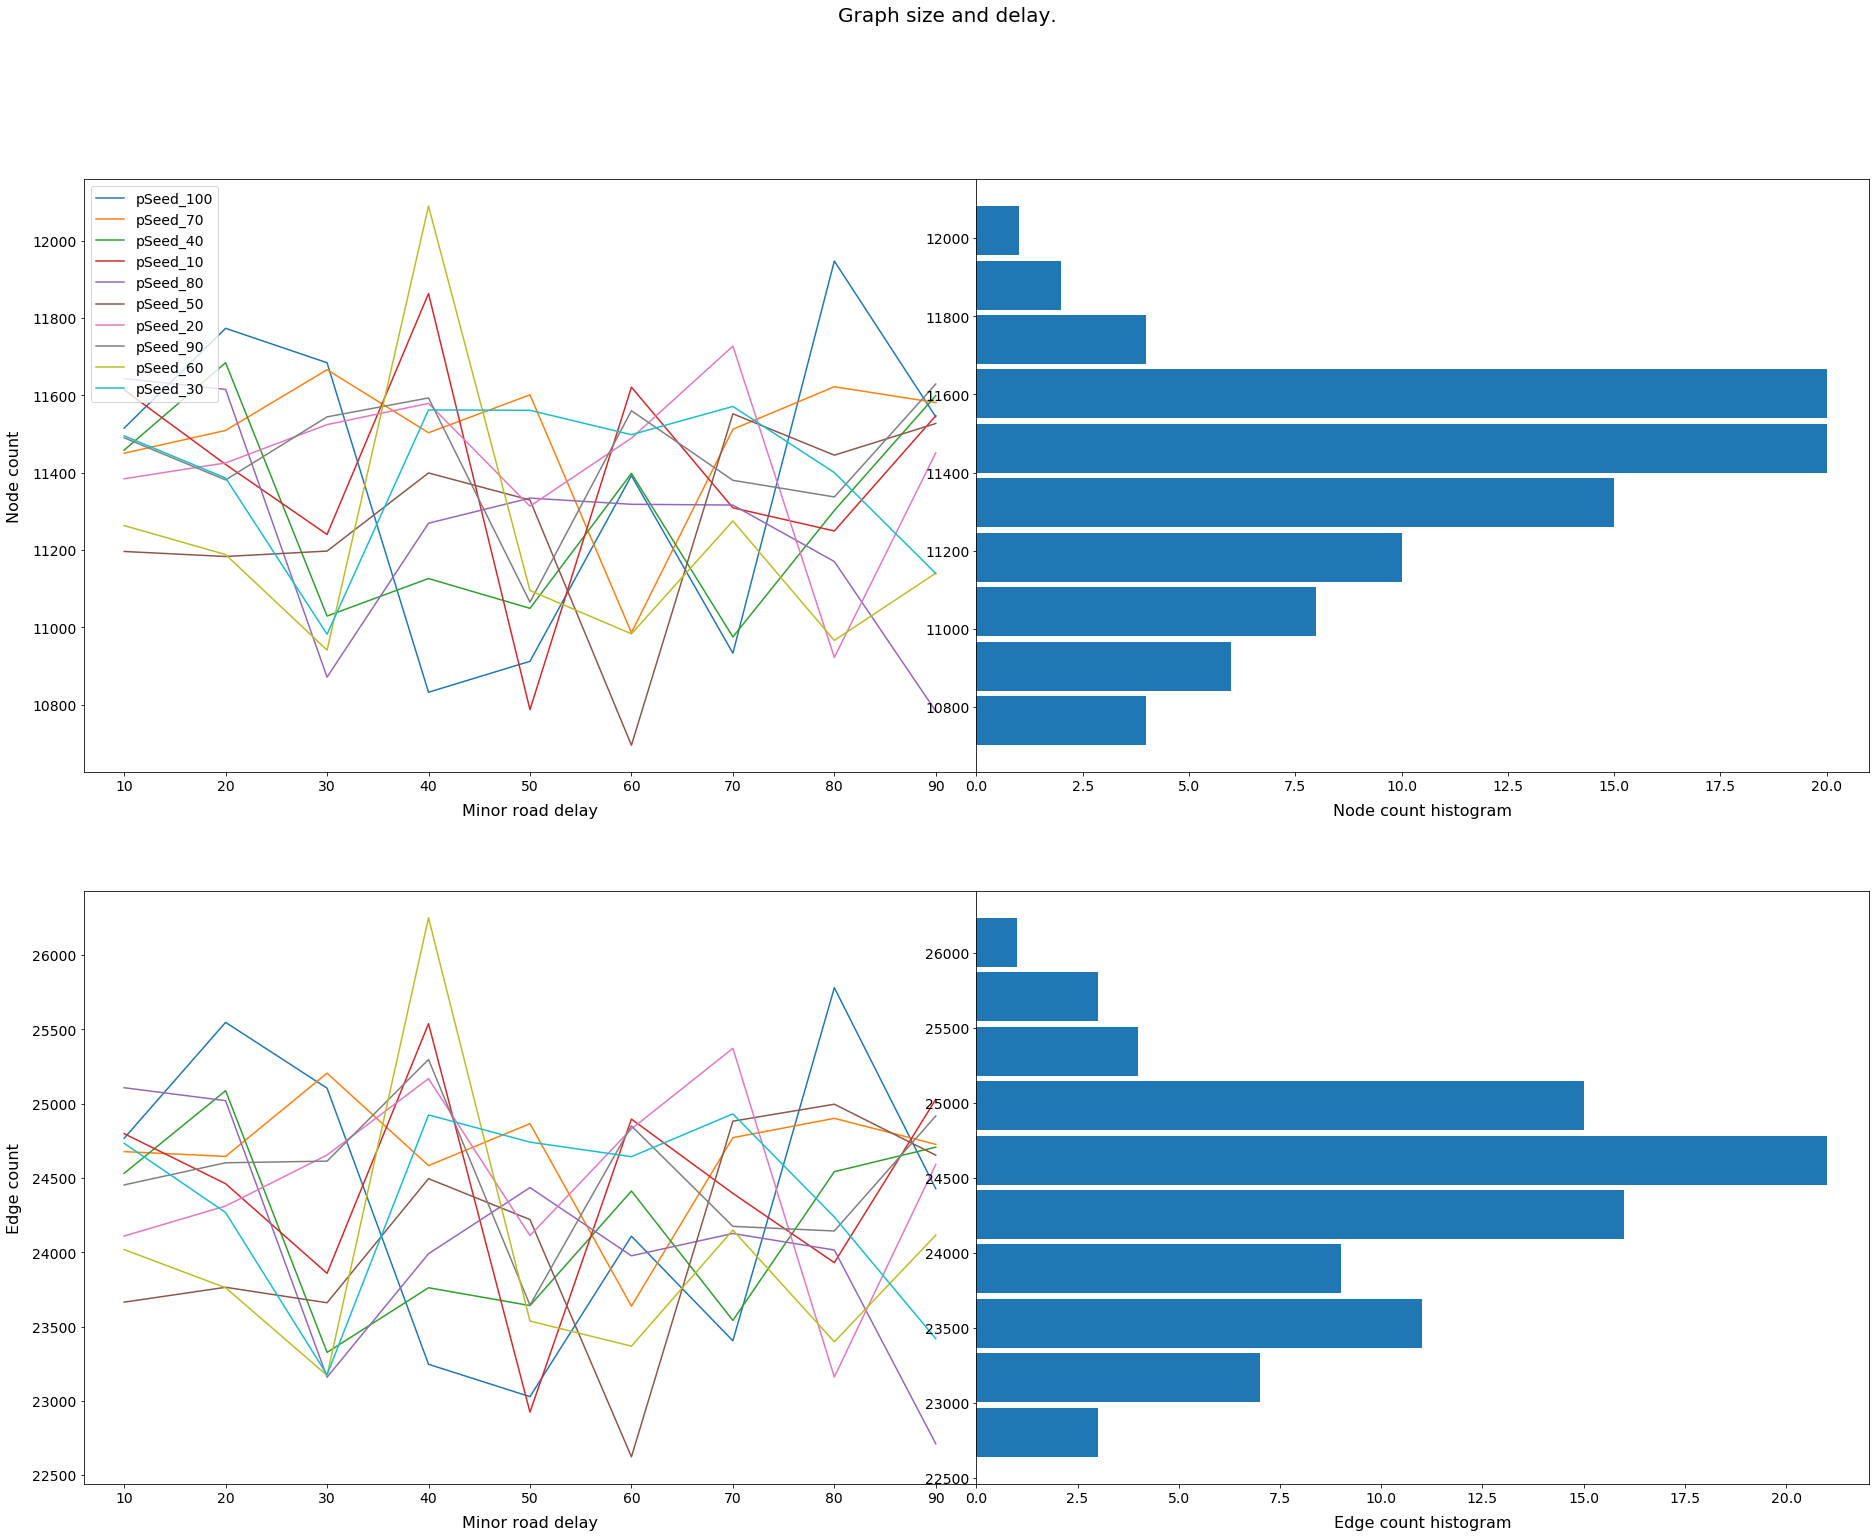

In [15]:
label1, label2 = 'num_nodes','num_edges'

fig, axes = plt.subplots(nrows=2, ncols=2,   figsize=(32, 24))

ax = axes[0][0]
for val in values:
    df_ = df[df.pSeed == val]
    df_.plot(kind='line', x=x_col, y=label1, label='pSeed_%s' % val, ax=ax)

ax.set_xlabel('Minor road delay', labelpad=10)
ax.set_ylabel('Node count', labelpad=10)
ax.legend(loc=2)
ax = axes[0][1]
df[[label1]].plot(kind='hist',rwidth=0.9,  ax=ax, orientation='horizontal')
ax.get_legend().remove()
ax.set_xlabel('Node count histogram', labelpad=10)

ax = axes[1][0]
for val in values:
    df_ = df[df.pSeed == val]
    df_.plot(kind='line', x=x_col, y=label2, label='pSeed_%s' % val, ax=ax)

ax.set_xlabel('Minor road delay', labelpad=10)
ax.set_ylabel('Edge count', labelpad=10)
ax.get_legend().remove()
ax = axes[1][1]
df[[label2]].plot(kind='hist',rwidth=0.9,  ax=ax, orientation='horizontal')
ax.get_legend().remove()
ax.set_xlabel('Edge count histogram', labelpad=10)
plt.subplots_adjust(wspace=0)

if SAVE:
    plt.savefig(path.join(output_dir, 'delay_counts.eps'), bbox_inches='tight')
